In [ ]:
# Required Libraries
!pip install pmdarima
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import statsmodels.api as sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.9 MB/s eta 0:00:00


In [ ]:
# Load data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRC4x6mecC7EkofiP3uJWZ3Y1jD1B2QMZXjlFtdP9-TOan6Fms2TqyOyssHegjTeG7iM6f-qX89vfvK/pub?gid=0&single=true&output=csv"
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'], format='%m-%Y')
df.set_index('Date', inplace=True)
df['Biomass']=df['Biomass'].dropna()

In [ ]:
# Developing the model
model = auto_arima(df['Biomass'], seasonal=True, m=12, suppress_warnings=True)



In [ ]:
model

ARIMA(order=(2, 1, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True)

In [ ]:
# Fitting the model
ab=model.fit(df['Biomass'])

In [ ]:
# Getting the predicted values
df['predicted'] = model.predict_in_sample()

# Getting the residuals
df['residuals'] = df['Biomass'] - df['predicted']

df.head()

,Biomass,predicted,residuals
Date,,,
2016-01-01,355.51,-0.876517,356.386517
2016-02-01,342.49,354.525374,-12.035374
2016-03-01,343.50,344.725896,-1.225896
2016-04-01,323.28,343.263419,-19.983419
2016-05-01,334.64,329.370538,5.269462


In [ ]:
# Calculating the average of the predicted values
average_predicted = df['predicted'].mean()

# Replacing the first value in the 'predicted' column with this average
df['predicted'].iloc[0] = average_predicted

In [ ]:
df.head()

,Biomass,predicted,residuals
Date,,,
2016-01-01,355.51,275.705520,356.386517
2016-02-01,342.49,354.525374,-12.035374
2016-03-01,343.50,344.725896,-1.225896
2016-04-01,323.28,343.263419,-19.983419
2016-05-01,334.64,329.370538,5.269462


In [ ]:
# Calculate the new residual for the first row
new_residual = df['Biomass'].iloc[0] - df['predicted'].iloc[0]

# Update the first value in the 'residuals' column
df['residuals'].iloc[0] = new_residual


In [ ]:
df.head()

,Biomass,predicted,residuals
Date,,,
2016-01-01,355.51,275.705520,79.804480
2016-02-01,342.49,354.525374,-12.035374
2016-03-01,343.50,344.725896,-1.225896
2016-04-01,323.28,343.263419,-19.983419
2016-05-01,334.64,329.370538,5.269462


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Calculating RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(df['Biomass'], df['predicted']))

# Calculating MSE (Mean Squared Error)
mse = mean_squared_error(df['Biomass'], df['predicted'])

# Calculating MAE (Mean Absolute Error)
mae = mean_absolute_error(df['Biomass'], df['predicted'])

# Calculating MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(df['Biomass'], df['predicted'])

# Printing the results
print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 31.745547841383722
MSE: 1007.7798077495827
MAE: 24.492970976608106
MAPE: 0.09124917309174355


In [ ]:
from sklearn.metrics import r2_score

# Define functions to calculate RMSE, MSE, MAE, and MAPE using residuals
def calculate_rmse(residuals):
    return np.sqrt(np.mean(np.square(residuals)))

def calculate_mse(residuals):
    return np.mean(np.square(residuals))

def calculate_mae(residuals):
    return np.mean(np.abs(residuals))

def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [ ]:
# Calculate R-squared
r_squared = r2_score(df['Biomass'], df['predicted'])

# Calculate metrics using residuals
residuals = df['residuals']
rmse_res = calculate_rmse(residuals)
mse_res = calculate_mse(residuals)
mae_res = calculate_mae(residuals)
mape_res = calculate_mape(df['Biomass'], df['predicted'])

rmse_res, mse_res, mae_res, mape_res, r_squared


(31.745547841383722,
 1007.7798077495827,
 24.492970976608106,
 9.124917309174355,
 0.6088828677545146)

In [ ]:
def calculate_r_squared(y_true, y_pred):
    """
    Calculate the R-squared value.

    Parameters:
    y_true (array-like): Actual values.
    y_pred (array-like): Predicted values.

    Returns:
    float: R-squared value.
    """
    # Calculate the total sum of squares
    tss = np.sum((y_true - np.mean(y_true)) ** 2)
    # Calculate the residual sum of squares
    rss = np.sum((y_true - y_pred) ** 2)
    # Calculate R-squared
    r_squared = 1 - (rss / tss)
    return r_squared

# Example usage of the function
# r_squared_value = calculate_r_squared(df['Biomass'], df['predicted'])
# print(r_squared_value)


In [ ]:
# Assuming df is your DataFrame with 'Biomass' and 'predicted' columns
r_squared_value = calculate_r_squared(df['Biomass'], df['predicted'])
print("R-squared value:", r_squared_value)


R-squared value: 0.6088828677545146


In [ ]:
a=forecast

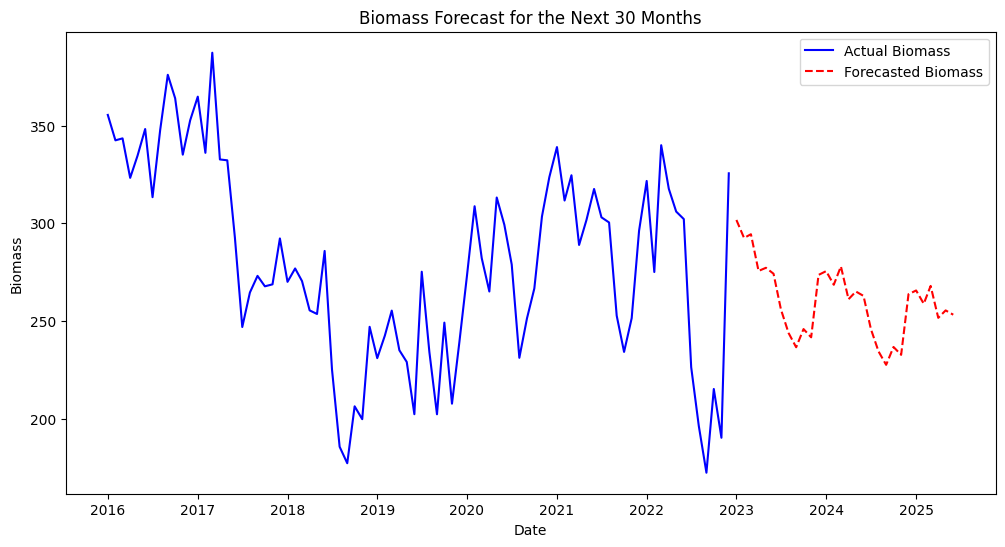

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Biomass'], label='Actual Biomass', color='blue')
plt.plot(a, label='Forecasted Biomass', color='red', linestyle='--')
plt.title('Biomass Forecast for the Next 30 Months')
plt.xlabel('Date')
plt.ylabel('Biomass')
plt.legend()
plt.show()


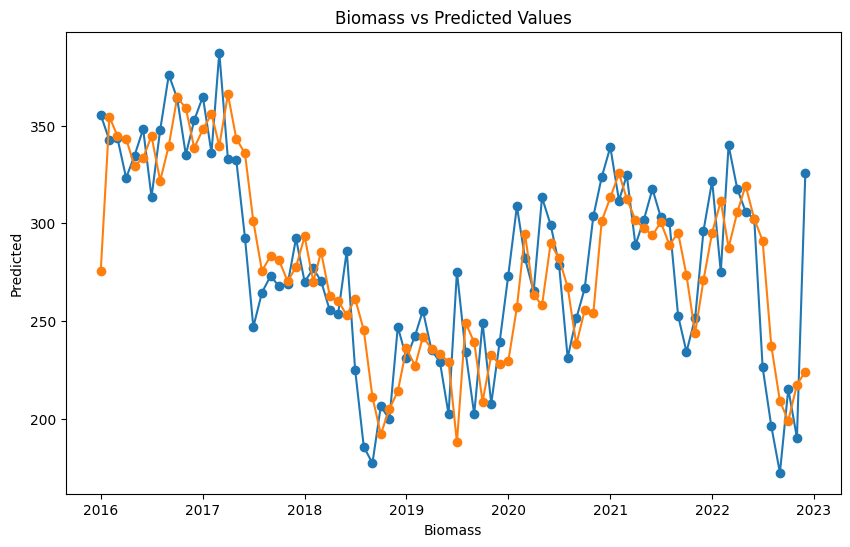

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Biomass'],  marker='o')
plt.plot(df['predicted'],marker='o')
plt.title('Biomass vs Predicted Values')
plt.xlabel('Biomass')
plt.ylabel('Predicted')
plt.show()